# Case Study on ANOVA
    XYZ Company has offices in four different zones. The company wishes to investigate the following :
    ● The mean sales generated by each zone.
    ● Total sales generated by all the zones for each month.
    ● Check whether all the zones generate the same amount of sales.
    Help the company to carry out their study with the help of data provided.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import scipy
from scipy.stats import f_oneway

In [2]:
df=pd.read_csv('Sales_data_zone_wise.csv')

In [3]:
df.head()

,Month,Zone - A,Zone - B,Zone - C,Zone - D
0,Month - 1,1483525,1748451,1523308,2267260
1,Month - 2,1238428,1707421,2212113,1994341
2,Month - 3,1860771,2091194,1282374,1241600
3,Month - 4,1871571,1759617,2290580,2252681
4,Month - 5,1244922,1606010,1818334,1326062


In [7]:
df.isna().sum()

Month       0
Zone - A    0
Zone - B    0
Zone - C    0
Zone - D    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Month     29 non-null     object
 1   Zone - A  29 non-null     int64 
 2   Zone - B  29 non-null     int64 
 3   Zone - C  29 non-null     int64 
 4   Zone - D  29 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.3+ KB


# 1. The mean sales generated by each zone.

In [10]:
df1=df.drop(columns=['Month'])

In [29]:
df1.describe()

,Zone - A,Zone - B,Zone - C,Zone - D
count,2.900000e+01,2.900000e+01,2.900000e+01,2.900000e+01
mean,1.540493e+06,1.755560e+06,1.772871e+06,1.842927e+06
std,2.619401e+05,1.683899e+05,3.331937e+05,3.750165e+05
min,1.128185e+06,1.527574e+06,1.237722e+06,1.234311e+06
25%,1.305972e+06,1.606010e+06,1.523308e+06,1.520406e+06
50%,1.534390e+06,1.740365e+06,1.767047e+06,1.854412e+06
75%,1.820196e+06,1.875658e+06,2.098463e+06,2.180416e+06
max,2.004480e+06,2.091194e+06,2.290580e+06,2.364132e+06


In [13]:
df2=df1.mean()

In [26]:
print('Mean sales for each zone=\n\n',round(df2,3))

Mean sales for each zone=

 Zone - A    1540493.138
Zone - B    1755559.586
Zone - C    1772871.034
Zone - D    1842926.759
dtype: float64


# 2.  Total sales generated by all the zones for each month.

In [84]:
df3=df.sum(axis=1)
df_col = pd.concat([df.Month,df3], axis=1)
dfcol = df_col.rename({0: 'Total sales'}, axis='columns') 

In [85]:
dfcol

,Month,Total sales
0,Month - 1,7022544
1,Month - 2,7152303
2,Month - 3,6475939
3,Month - 4,8174449
4,Month - 5,5995328
5,Month - 6,7151387
6,Month - 7,7287108
7,Month - 8,7816299
8,Month - 9,6703395
9,Month - 10,7128210


# 3. Check whether all the zones generate the same amount of sales.

*  **Ho**:all the zones generate the same amount of sales
*  **Ha**:all the zones generate different amount of sales
*  $\alpha $: 0.05

In [87]:
a=df['Zone - A']
b=df['Zone - B']
c=df['Zone - C']
d=df['Zone - D']
fvalue, pvalue = f_oneway(a, b, c,d)
fvalue

5.672056106843581

In [88]:
pvalue

0.0011827601694503335

# Insight
The p value obtained from ANOVA analysis is significant (p < 0.05), and therefore, we reject the null hypothesis and conclude that all the zones generate different amount of sales


In [95]:
df_melt = pd.melt(df.reset_index(), id_vars=['Month'], value_vars=['Zone - A', 'Zone - B', 'Zone - C', 'Zone - D'])

In [96]:
df_melt.columns = ['Month', 'Zone', 'Profit']

In [100]:
df_melt.head()

,Month,Zone,Profit
0,Month - 1,Zone - A,1483525
1,Month - 2,Zone - A,1238428
2,Month - 3,Zone - A,1860771
3,Month - 4,Zone - A,1871571
4,Month - 5,Zone - A,1244922


In [132]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [142]:
model= ols('Profit ~ C(Month) + C(Zone) ', data=df_melt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     1.454
Date:                Mon, 20 Dec 2021   Prob (F-statistic):             0.0912
Time:                        04:43:01   Log-Likelihood:                -1606.9
No. Observations:                 116   AIC:                             3278.
Df Residuals:                      84   BIC:                             3366.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1.568e+06   1.55e+05     10.116      0.000    1.26e+06    1.88e+06
C(Month)[T.Month - 10]  2.642e+04   2.09e+05      0.127      0.900   -3.89e+05    4.41e+05
C(Month)[T.Month - 11]  2559.7500   2.09e+05      0.012      0.990   -4.12e+05    4.18e+05
C(Month)[T.Month - 12] -2.279e+05   2.09e+05     -1.092      0.278   -6.43e+05    1.87e+05
C(Month)[T.Month - 13] -2.743e+05   2.09e+05     -1.314      0.192   -6.89e+05    1.41e+05
C(Month)[T.Month - 14]  3.324e+04   2.09e+05      0.159      0.874   -3.82e+05    4.48e+05
C(Month)[T.Month - 15] -2.721e+05   2.09e+05     -1.304      0.196   -6.87e+05    1.43e+05
C(Month)[T.Month - 16]  -1.29e+05   2.09e+05     -0.618      0.538   -5.44e+05    2.86e+05
C(Month)[T.Month - 17]  3.171e+04   2.09e+05      0.152      0.880   -3.83e+05    4.47e+05
C(Month)[T.Month - 18]  1.524e+04   2.09e+05      0.073      0.942      -4e+05     4.3e+05
C(Month)[T.Month - 19] -1.265e+04   2.09e+05     -0.061      0.952   -4.28e+05    4.02e+05
C(Month)[T.Month - 2]   3.244e+04   2.09e+05      0.155      0.877   -3.83e+05    4.47e+05
C(Month)[T.Month - 20]  2.551e+04   2.09e+05      0.122      0.903    -3.9e+05    4.41e+05
C(Month)[T.Month - 21]  9.176e+04   2.09e+05      0.440      0.661   -3.23e+05    5.07e+05
C(Month)[T.Month - 22]  1.344e+05   2.09e+05      0.644      0.521   -2.81e+05    5.49e+05
C(Month)[T.Month - 23] -8.366e+04   2.09e+05     -0.401      0.690   -4.99e+05    3.31e+05
C(Month)[T.Month - 24]  1.906e+05   2.09e+05      0.913      0.364   -2.24e+05    6.06e+05
C(Month)[T.Month - 25] -2.317e+05   2.09e+05     -1.110      0.270   -6.47e+05    1.83e+05
C(Month)[T.Month - 26] -1.275e+05   2.09e+05     -0.611      0.543   -5.43e+05    2.87e+05
C(Month)[T.Month - 27] -1.887e+05   2.09e+05     -0.904      0.369   -6.04e+05    2.26e+05
C(Month)[T.Month - 28]  1.121e+05   2.09e+05      0.537      0.593   -3.03e+05    5.27e+05
C(Month)[T.Month - 29] -6.257e+04   2.09e+05     -0.300      0.765   -4.78e+05    3.52e+05
C(Month)[T.Month - 3]  -1.367e+05   2.09e+05     -0.655      0.514   -5.52e+05    2.78e+05
C(Month)[T.Month - 4]    2.88e+05   2.09e+05      1.380      0.171   -1.27e+05    7.03e+05
C(Month)[T.Month - 5]  -2.568e+05   2.09e+05     -1.230      0.222   -6.72e+05    1.58e+05
C(Month)[T.Month - 6]   3.221e+04   2.09e+05      0.154      0.878   -3.83e+05    4.47e+05
C(Month)[T.Month - 7]   6.614e+04   2.09e+05      0.317      0.752   -3.49e+05    4.81e+05
C(Month)[T.Month - 8]   1.984e+05   2.09e+05      0.951      0.344   -2.17e+05    6.13e+05
C(Month)[T.Month - 9]  -7.979e+04   2.09e+05     -0.382      0.703   -4.95e+05    3.35e+05
C(Zone)[T.Zone - B]     2.151e+05   7.75e+04      2.775      0.007    6.09e+04    3.69e+05
C(Zone)[T.Zone - C]     2.324e+05   7.75e+04      2.998      0.004    7.82e+04  

In [140]:
anova_table =sm.stats.anova_lm(model, typ=2)
anova_table 

,sum_sq,df,F,PR(>F)
C(Month),2.444073e+12,28.0,1.002028,0.476823
C(Zone),1.483058e+12,3.0,5.674932,0.001374
Residual,7.317376e+12,84.0,NaN,NaN


In [173]:
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df_melt, res_var='Profit', anova_model='Profit~C(Month)+C(Zone)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(Month),28.0,2.444073e+12,8.728832e+10,1.002028,0.476823
C(Zone),3.0,1.483058e+12,4.943525e+11,5.674932,0.001374
Residual,84.0,7.317376e+12,8.711162e+10,NaN,NaN


<Figure size 2880x2160 with 0 Axes>

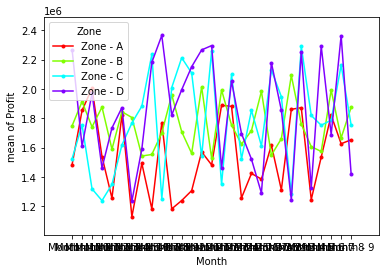

<Figure size 2880x2160 with 0 Axes>

In [160]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

fig = interaction_plot(x=df_melt['Month'], trace=df_melt['Zone'], response=df_melt['Profit'])


In [174]:
res = stat()
res.tukey_hsd(df=df_melt, res_var='Profit', xfac_var='Month', anova_model='Profit~C(Month)+C(Zone)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Month - 1,Month - 2,32439.75,-774010.802348,8.388903e+05,0.219821,0.9
1,Month - 1,Month - 3,136651.25,-669799.302348,9.431018e+05,0.925988,0.9
2,Month - 1,Month - 4,287976.25,-518474.302348,1.094427e+06,1.951410,0.9
3,Month - 1,Month - 5,256804.00,-549646.552348,1.063255e+06,1.740178,0.9
4,Month - 1,Month - 6,32210.75,-774239.802348,8.386613e+05,0.218269,0.9
...,...,...,...,...,...,...,...
401,Month - 26,Month - 28,239640.00,-566810.552348,1.046091e+06,1.623870,0.9
402,Month - 26,Month - 29,64979.25,-741471.302348,8.714298e+05,0.440318,0.9
403,Month - 27,Month - 28,300750.50,-505700.052348,1.107201e+06,2.037972,0.9
404,Month - 27,Month - 29,126089.75,-680360.802348,9.325403e+05,0.854421,0.9


In [169]:
res.tukey_hsd(df=df_melt, res_var='Profit', xfac_var='Zone', anova_model='Profit~C(Month)+C(Zone)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Zone - A,Zone - B,215066.448276,11889.658701,418243.237851,3.924042,0.033783
1,Zone - A,Zone - C,232377.896552,29201.106977,435554.686127,4.239902,0.018406
2,Zone - A,Zone - D,302433.620690,99256.831115,505610.410265,5.518119,0.001085
3,Zone - B,Zone - C,17311.448276,-185865.341299,220488.237851,0.315860,0.900000
4,Zone - B,Zone - D,87367.172414,-115809.617161,290543.961989,1.594077,0.654262
5,Zone - C,Zone - D,70055.724138,-133121.065437,273232.513713,1.278217,0.778515
